In [23]:
import pandas as pd
import matplotlib.pyplot as plt
mob = pd.read_csv("Mobile Reviews Sentiment.csv")

Text(0, 0.5, 'Average Rating')

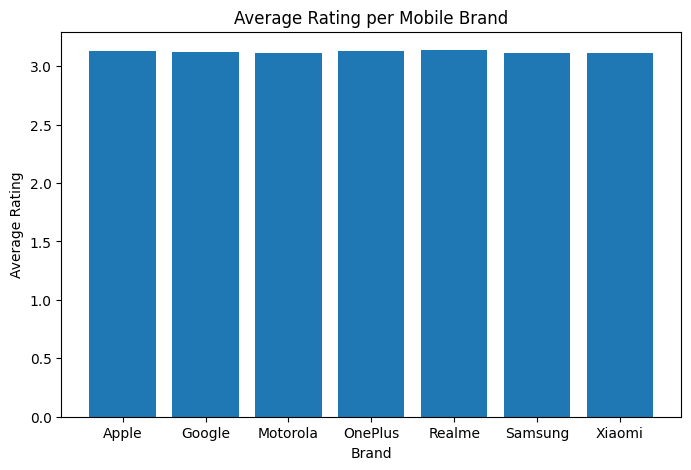

In [24]:
#Task 1
avgRating = mob.groupby("brand")["rating"].mean()

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(avgRating.index, avgRating.values)
ax.set_title("Average Rating per Mobile Brand")
ax.set_xlabel("Brand")
ax.set_ylabel("Average Rating")


Text(0, 0.5, 'Average Price(USD)')

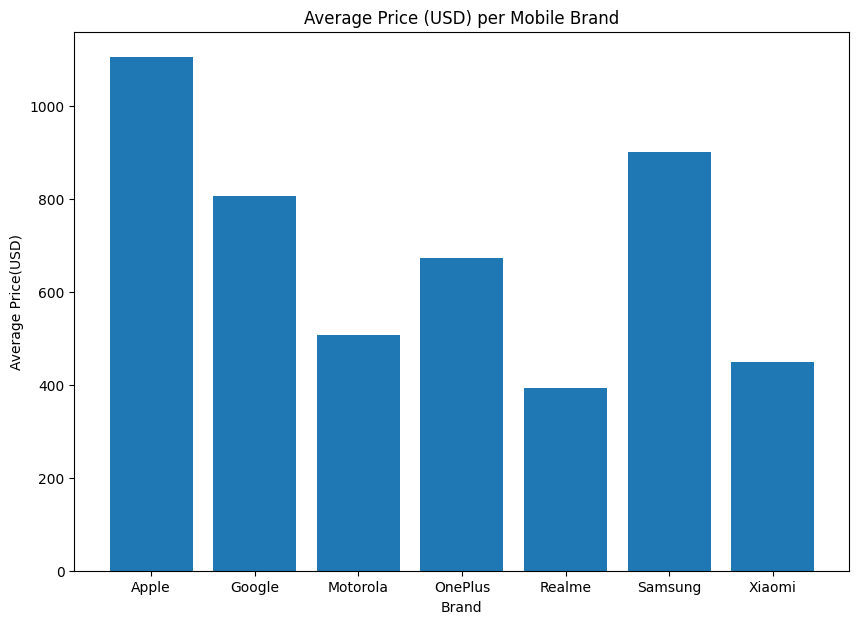

In [25]:
#Task 2
avgPrice = mob.groupby("brand")["price_usd"].mean()

fig, ax = plt.subplots(figsize=(10,7))
ax.bar(avgPrice.index, avgPrice.values)
ax.set_title("Average Price (USD) per Mobile Brand")
ax.set_xlabel("Brand")
ax.set_ylabel("Average Price(USD)")


Text(0.5, 1.0, 'Sentiment Distribution')

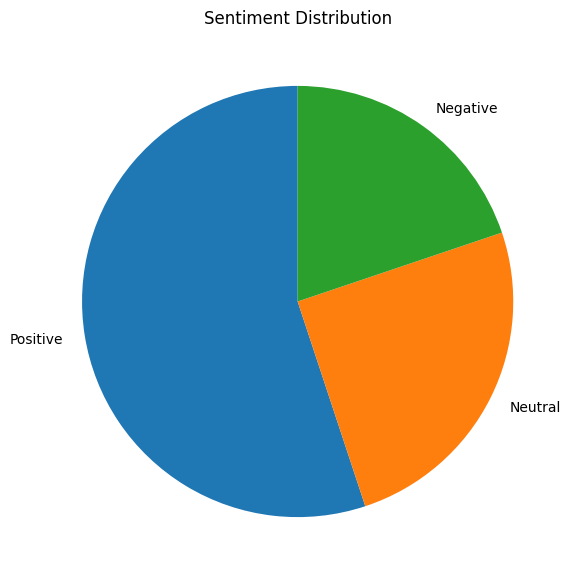

In [26]:
#Task 3
senti = mob["sentiment"].value_counts()

fig, ax = plt.subplots(figsize=(7,7))
ax.pie(senti, labels=senti.index, startangle=90)
ax.set_title("Sentiment Distribution")

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


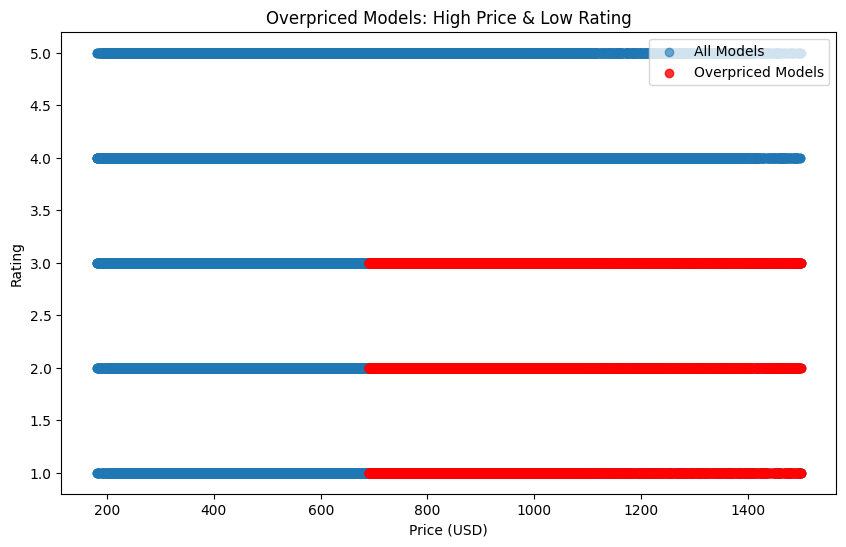

In [27]:
#Task 4
price_mean = mob['price_usd'].mean()
rating_mean = mob['rating'].mean()

overpriced_models = mob[(mob['price_usd'] > price_mean) & (mob['rating'] < rating_mean)]

fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(mob['price_usd'], mob['rating'], alpha=0.6, label='All Models')
ax.scatter(overpriced_models['price_usd'], overpriced_models['rating'], color='red', label='Overpriced Models', alpha=0.8)
ax.set_xlabel('Price (USD)')
ax.set_ylabel('Rating')
ax.set_title('Overpriced Models: High Price & Low Rating')
ax.legend()


<Figure size 800x600 with 0 Axes>

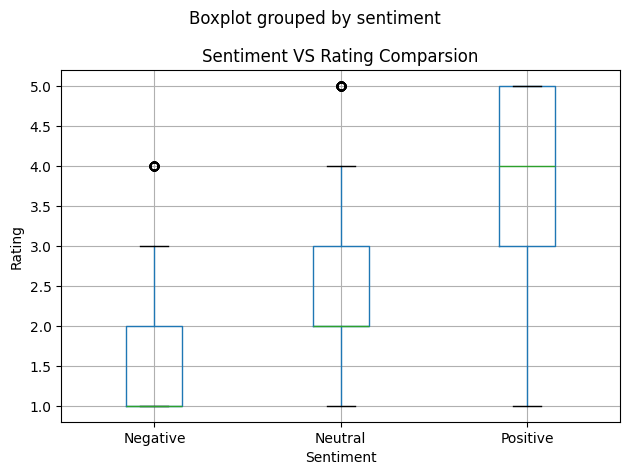

In [28]:
#Task 5
plt.figure(figsize=(8,6))
mob.boxplot(column="rating", by="sentiment")
plt.title("Sentiment VS Rating Comparsion")
plt.xlabel("Sentiment")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()


In [29]:
#task 6, Initialisation
soft = pd.read_csv("Software houses PK .csv")
soft["Services"] = soft["Services"].fillna("-")
soft.columns

Index(['Company Name', 'City', 'Address', 'Contact No', 'Services'], dtype='object')

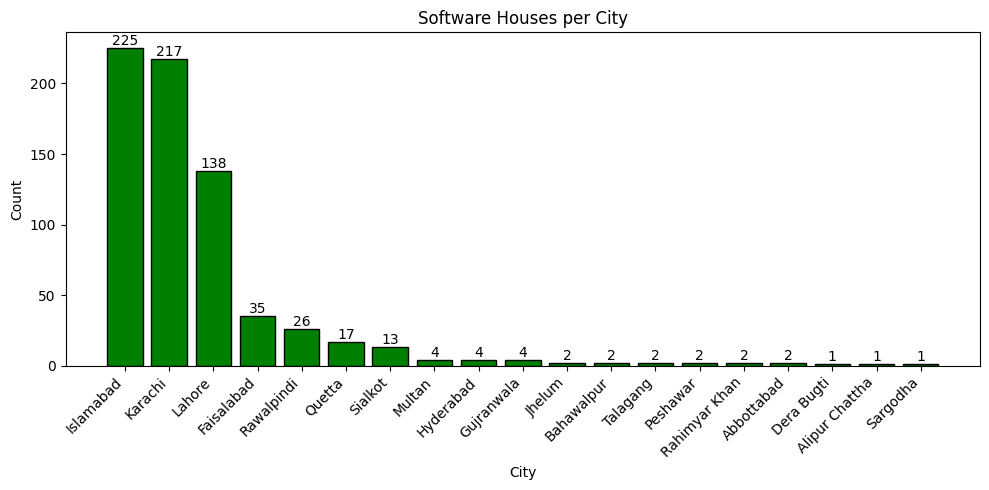

In [30]:
# Task 6 (a)
cityCounts = soft["City"].value_counts()

fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(cityCounts.index, cityCounts.values, color='green', edgecolor='black')
ax.set_title("Software Houses per City")
ax.set_xlabel("City")
ax.set_ylabel("Count")
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.05, f'{int(height)}', ha="center", va='bottom')

plt.tight_layout()
plt.show()

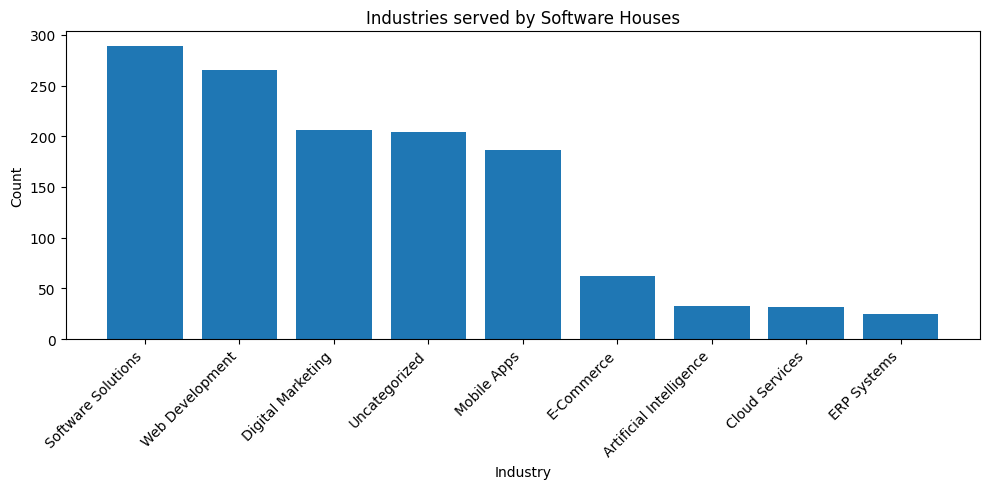

In [31]:
#Task 6(b)
industryKeyWords = {
    "web": "Web Development",
    "app": "Mobile Apps",
    "android": "Mobile Apps",
    "ios": "Mobile Apps",
    "ai": "Artificial Intelligence",
    "machine learning": "Artificial Intelligence",
    "ml": "Artificial Intelligence",
    "ecommerce": "E-Commerce",
    "e-commerce": "E-Commerce",
    "marketing": "Digital Marketing",
    "seo": "Digital Marketing",
    "cloud": "Cloud Services",
    "software": "Software Solutions",
    "erp": "ERP Systems"
}
def get_industrues(text):
    text= text.lower()
    found = [v for k, v in industryKeyWords.items() if k in text]
    return found if found else ["Uncategorized"]

soft["Industries"] = soft["Services"].apply(get_industrues)
industryDf = soft.explode("Industries")
industryCounts = industryDf["Industries"].value_counts()

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(industryCounts.index, industryCounts.values)
ax.set_title("Industries served by Software Houses")
ax.set_xlabel("Industry")
ax.set_ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

Text(0, 0.5, 'Count')

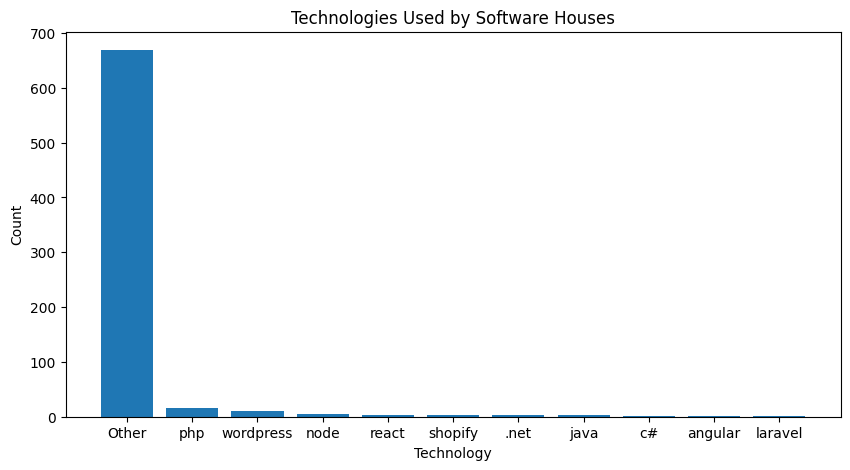

In [32]:
#Task 6(b)
techKeyWords = [
    "php","python","django","flask","node","react","angular","vue",
    "java","c#",".net","wordpress","shopify","laravel","swift","kotlin"]
def extractTech(text):
    text = text.lower()
    return [t for t in techKeyWords if t in text] or ["Other"]

soft["Technologies"] = soft["Services"].apply(extractTech)
techDf = soft.explode("Technologies")
techCounts = techDf["Technologies"].value_counts()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(techCounts.index, techCounts.values)
ax.set_title("Technologies Used by Software Houses")
ax.set_xlabel("Technology")
ax.set_ylabel("Count")


Text(0, 0.5, 'Frequency')

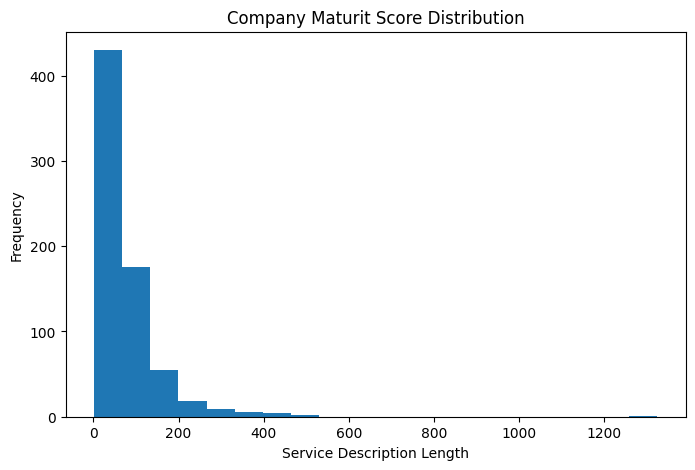

In [33]:
soft["MaturityScore"] = soft['Services'].apply(lambda x: len(str(x)))
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(soft["MaturityScore"], bins=20)
ax.set_title("Company Maturit Score Distribution")
ax.set_xlabel("Service Description Length")
ax.set_ylabel("Frequency")


In [34]:
#Task 6(e)
soft["ServiceCount"] = soft["Services"].apply(lambda x: len(str(x).split(",")))
top10 = soft.sort_values("ServiceCount", ascending=False)[["Company Name", "ServiceCount", "City", "Services"]].head(10)
print(top10.to_string(index=False))

                               Company Name  ServiceCount       City                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    